<a href="https://colab.research.google.com/github/sraeisi/MachineLearning_Physics/blob/master/Data%5CMLP_Datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-talk')

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

import requests, io

<ipython-input-2-15abe9c60b85>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')


Black Body Radiation
================

For more info, see

http://galileo.phys.virginia.edu/classes/252/black_body_radiation.html


The link to the data: 

http://galileo.phys.virginia.edu/classes/252/bbr.xls

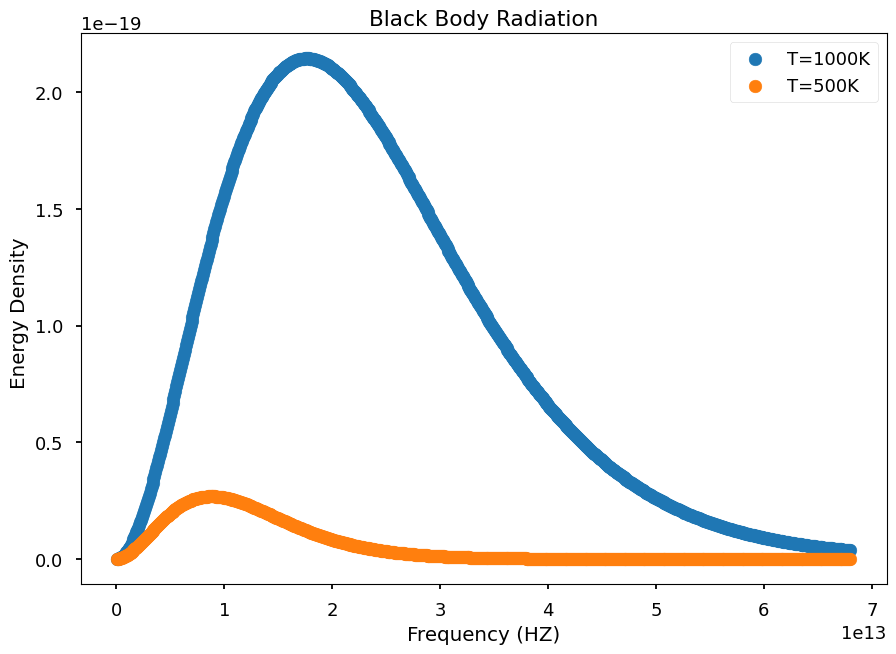

In [ ]:
#####BBR###### 
## This data is collected from galileo.phys.virginia.edu/classes/252
url = "https://github.com/sraeisi/MachineLearning_Physics/blob/master/Data/bbr.xls?raw=true"
data_bbr = pd.read_excel(url)

n_s_rate=1

x_label = 'Frequency (HZ)'
y_label = 'Energy Density '
plt_title = 'Black Body Radiation'
fig = plt.figure()
ax = fig.add_subplot(111, xlabel=x_label, ylabel=y_label, title=plt_title)

ax.scatter(data_bbr[0][::n_s_rate], data_bbr['T'][::n_s_rate], label='T=1000K')
ax.scatter(data_bbr[0][::n_s_rate], data_bbr['T/2'][::n_s_rate], label='T=500K')
plt.legend()
plt.show()

Force of a Spring
================

This data is taken from lab report of students in Phys_Lab 3 that I thought in 2018.



In [ ]:
import io, requests

url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Spring.csv'
s = requests.get(url).content
exp_data = pd.read_csv(io.StringIO(s.decode('utf-8')))


exp_data

,Displacement,Force
0,11.5,0.0
1,14.7,0.1
2,18.0,0.2
3,21.3,0.3
4,24.5,0.4
5,27.6,0.5


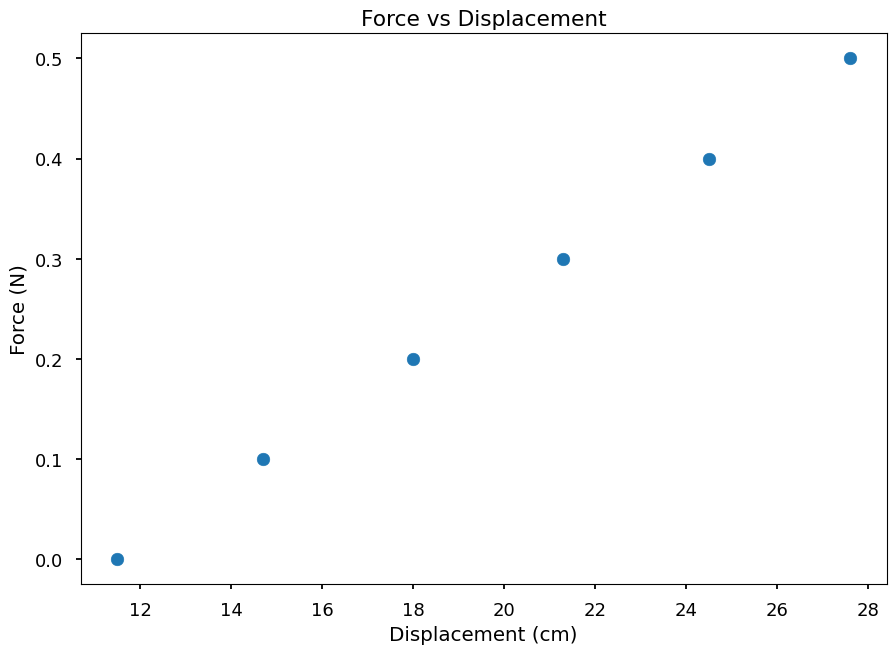

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='Displacement (cm)', ylabel='Force (N)', title='Force vs Displacement')
plt.scatter(exp_data.Displacement, exp_data.Force, label='Real data')
plt.show()


Ground State Energies of Molecules
=============
These are the ground state energies of some molecules based on their different 
chemical bounds. 


Data taken from https://www.kaggle.com/burakhmmtgl/energy-molecule

The data has 1275 features. "The first 1275 columns are entries in the Coulomb matrix that act as molecular features. The 1276th column is the Pubchem Id where the molecular structures are obtained. The 1277th column is the atomization energy calculated by simulations using the Quantum Espresso package."
For more info, see: 

https://arxiv.org/abs/1609.07124

Source code for generating the data

https://github.com/bhimmetoglu/RoboBohr

In [ ]:
'''
These are the ground state energies of some molecules based on their different 
chemical bounds. 
'''
import io, requests
url = 'https://www.dropbox.com/s/das9t6vwp7t4b7f/roboBohr.csv.zip?dl=1'
s=requests.get(url, stream=True).content
data=pd.read_csv(io.BytesIO(s) , compression='zip' , index_col=0)
 
'''
Alternatively, you can download the file into your computer and run the following code. 
You need to uncomment it first. 
'''    
# data = pd.read_csv('roboBohr.csv.zip', compression='zip', index_col=0)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,1267,1268,1269,1270,1271,1272,1273,1274,pubchem_id,Eat
0,73.516695,17.817765,12.469551,12.458130,12.454607,12.447345,12.433065,12.426926,12.387474,12.365984,...,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,25004,-19.013763
1,73.516695,20.649126,18.527789,17.891535,17.887995,17.871731,17.852586,17.729842,15.864270,15.227643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25005,-10.161019
2,73.516695,17.830377,12.512263,12.404775,12.394493,12.391564,12.324461,12.238106,10.423249,8.698826,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25006,-9.376619
3,73.516695,17.875810,17.871259,17.862402,17.850920,17.850440,12.558105,12.557645,12.517583,12.444141,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25009,-13.776438
4,73.516695,17.883818,17.868256,17.864221,17.818540,12.508657,12.490519,12.450098,10.597068,10.595914,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25011,-8.537140


Particle Identification from Detector Responses
===================

According to Kaggle:

"A somewhat simplified dataset of a GEANT based simulation of electron-proton inelastic scattering measured by a particle detector system."

There are 4 types of particles in the dataset which are identifies with code names, positron (-11), pion (211), kaon (321), and proton (2212). 

There are also 6 features. 

In [ ]:
########Particles#######
# Data taken from https://www.kaggle.com/naharrison/particle-identification-from-detector-responses

url = 'https://www.dropbox.com/s/66dbhxl93y41coe/particle-identification-from-detector-responses.zip?dl=1'
s=requests.get(url, stream=True).content
data_prtcl=pd.read_csv(io.BytesIO(s) , compression='zip' )

## Let's keep only a fraction of the data
data_prtcl = data_prtcl.sample(100000)
data_prtcl.head()

,id,p,theta,beta,nphe,ein,eout
1843822,211,1.633020,0.195028,0.987735,0,0.037674,0.041291
2095459,2212,0.872053,0.519632,0.676106,0,0.078874,0.045045
220394,211,1.109940,0.441653,0.993575,0,0.027237,0.214282
2565654,211,1.764400,0.305188,1.059320,0,0.395331,0.000000
550253,2212,0.766613,0.601379,0.629501,0,0.000000,0.000000


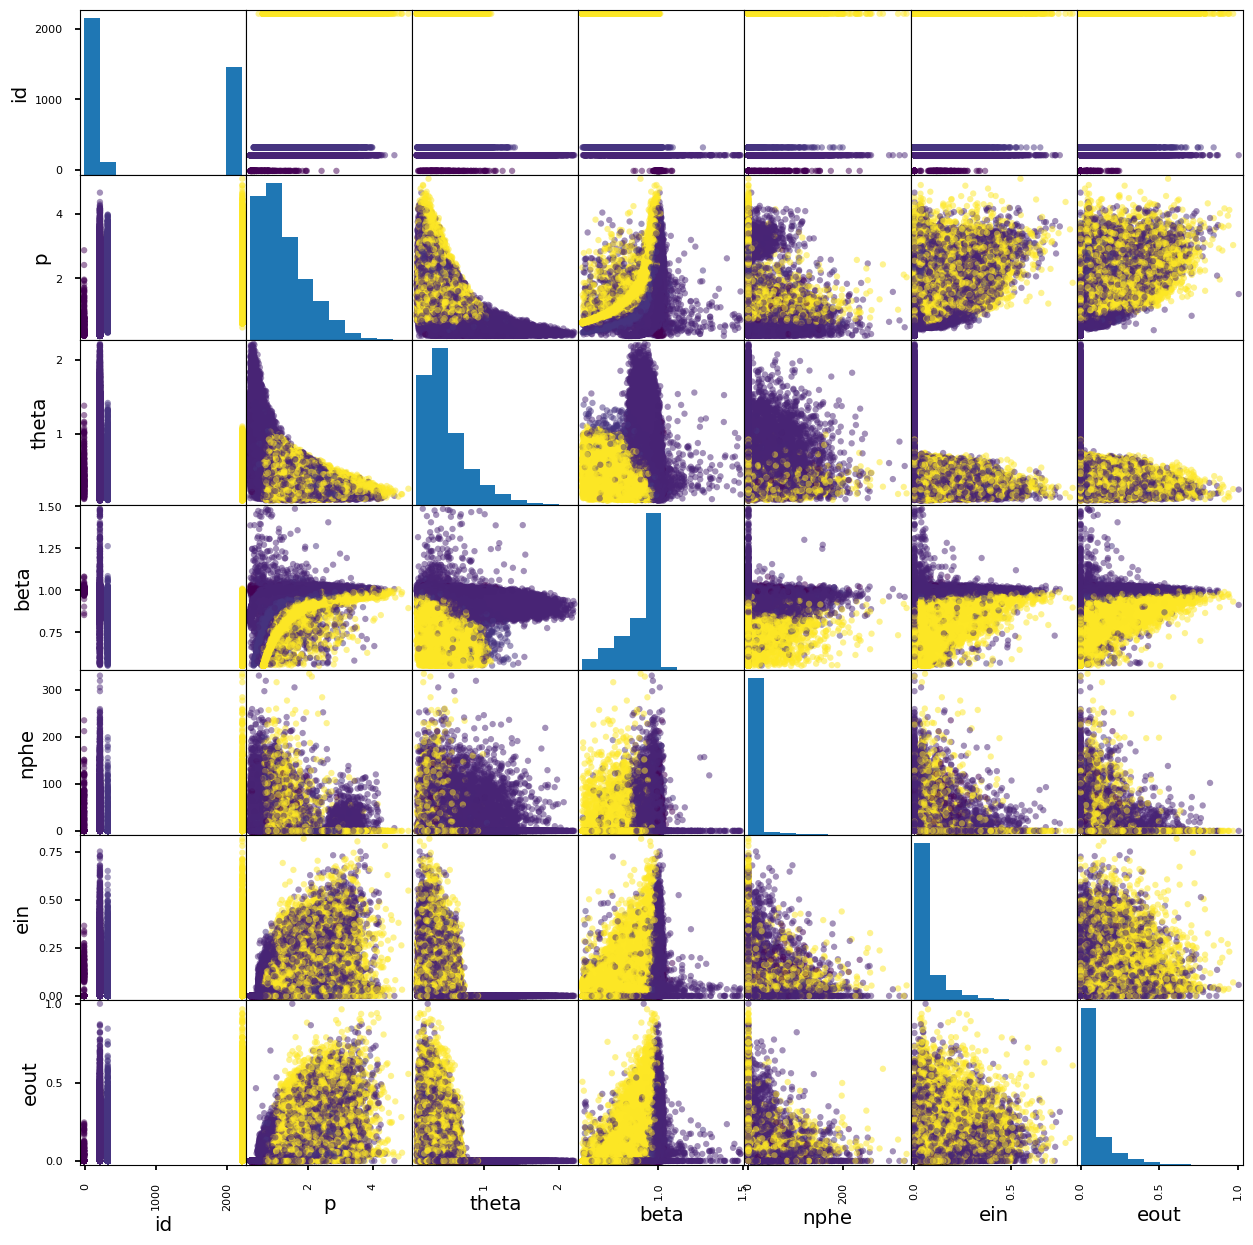

In [ ]:
pd.plotting.scatter_matrix(data_prtcl, figsize=(15,15), c =data_prtcl.id )
plt.show()

Sunspots
==================
For this part, we use the sunspot data. This data contains the mean value of the number of sunspots for each month from 1749.

You can find more information about this dataset from SIDC.

In [ ]:
# data = pd.read_csv('monthly-sunspots.csv', index_col = 0)
import requests, io
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/monthly-sunspots.csv'
c = requests.get(url, stream=True).content
data = pd.read_csv(io.BytesIO(c), index_col = 0)

data.head()

Global Temperature of Earth
================

https://berkeleyearth.org/data/

https://berkeleyearth.org/global-temperature-report-for-2020/


https://en.wikipedia.org/wiki/Global_temperature_record

Galaxy Zoo II
=================

The data here is take from the Galaxy Zoo II survey. For detailed information, see

https://arxiv.org/pdf/1308.3496.pdf

The labels are more involved. Here I simplified the classification problem in the sense that the labels here are only the answers to the first question in the survey, i.e. Is the galaxy simply smooth, and rounded, with no sign of a disk? 

answers: 

1. smooth, 

2. features or disk, 

3. star or artifact).

In [ ]:
import io, requests, zipfile
import pandas as pd

url_x = "https://www.dropbox.com/s/optw30o55q6mxlw/Cropped%26resized_GS_100_10000_withlabels.npz?dl=1"
url_y = 'https://www.dropbox.com/s/ctjjap42qilhu9s/Y_1.csv?dl=1'

### This file contains classes and the ids. 
s=requests.get(url_y, stream=True).content
df = pd.read_csv(io.BytesIO(s), index_col=0) 

### This file contains images and the ids. 
s=requests.get(url_x, stream=True).content
# d = np.load(io.BytesIO(s))
X, ids = [np.load(io.BytesIO(s))[f] for f in ['imgs','ids']]
ids = ids.astype('float')

### We can make the labels based on the ids in the X file.
Y = df.loc[ids].values
print(Y.shape)
print(len(Y) == len(X) )

Persian Hand-written Numbers 
========================

In [ ]:
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_X.npz'
s=requests.get(url, stream=True).content
X = np.load(io.BytesIO(s) )['arr_0']
url = 'https://raw.githubusercontent.com/sraeisi/MachineLearning_Physics/master/Data/Farsi_digits_Y.npz'
s=requests.get(url, stream=True).content
Y = np.load(io.BytesIO(s) )['arr_0']

# X = np.load('X.npz')['arr_0']
# Y = np.load('Y.npz')['arr_0']


from sklearn.utils import shuffle
X, Y = shuffle(X,Y, random_state = 0 )

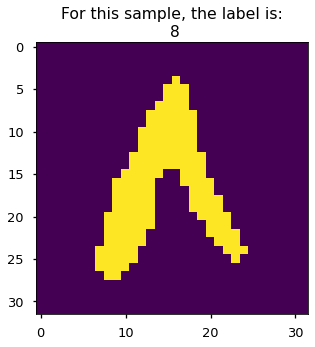

In [ ]:
rand_ind = np.random.randint(0,len(Y) )

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(1,1,1, title =f'For this sample, the label is:\n {Y[rand_ind]}' )
ax.imshow(X[rand_ind])
plt.show()